In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Expermenting with Classification: Dry Bean Dataset

In [3]:
bean_df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
bean_df = bean_df.astype({'Class':'category'})
bean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Exploratory Data Analysis

,Column,Mean,Median,Standard Deviation,Min,Max
0,Area,53048.284549,44652.000000,29323.018477,20420,254616
1,Perimeter,855.283459,794.941000,214.281824,524.736,1985.37
2,MajorAxisLength,320.141867,296.883367,85.691038,183.601165,738.860153
3,MinorAxisLength,202.270714,192.431733,44.968439,122.512653,460.198497
4,AspectRation,1.583242,1.551124,0.246669,1.024868,2.430306
5,Eccentricity,0.750895,0.764441,0.091998,0.218951,0.911423
6,ConvexArea,53768.200206,45178.000000,29773.822016,20684,263261
7,EquivDiameter,253.064220,238.438026,59.174946,161.243764,569.374358
8,Extent,0.749733,0.759859,0.049085,0.555315,0.866195
9,Solidity,0.987143,0.988283,0.004660,0.919246,0.994677


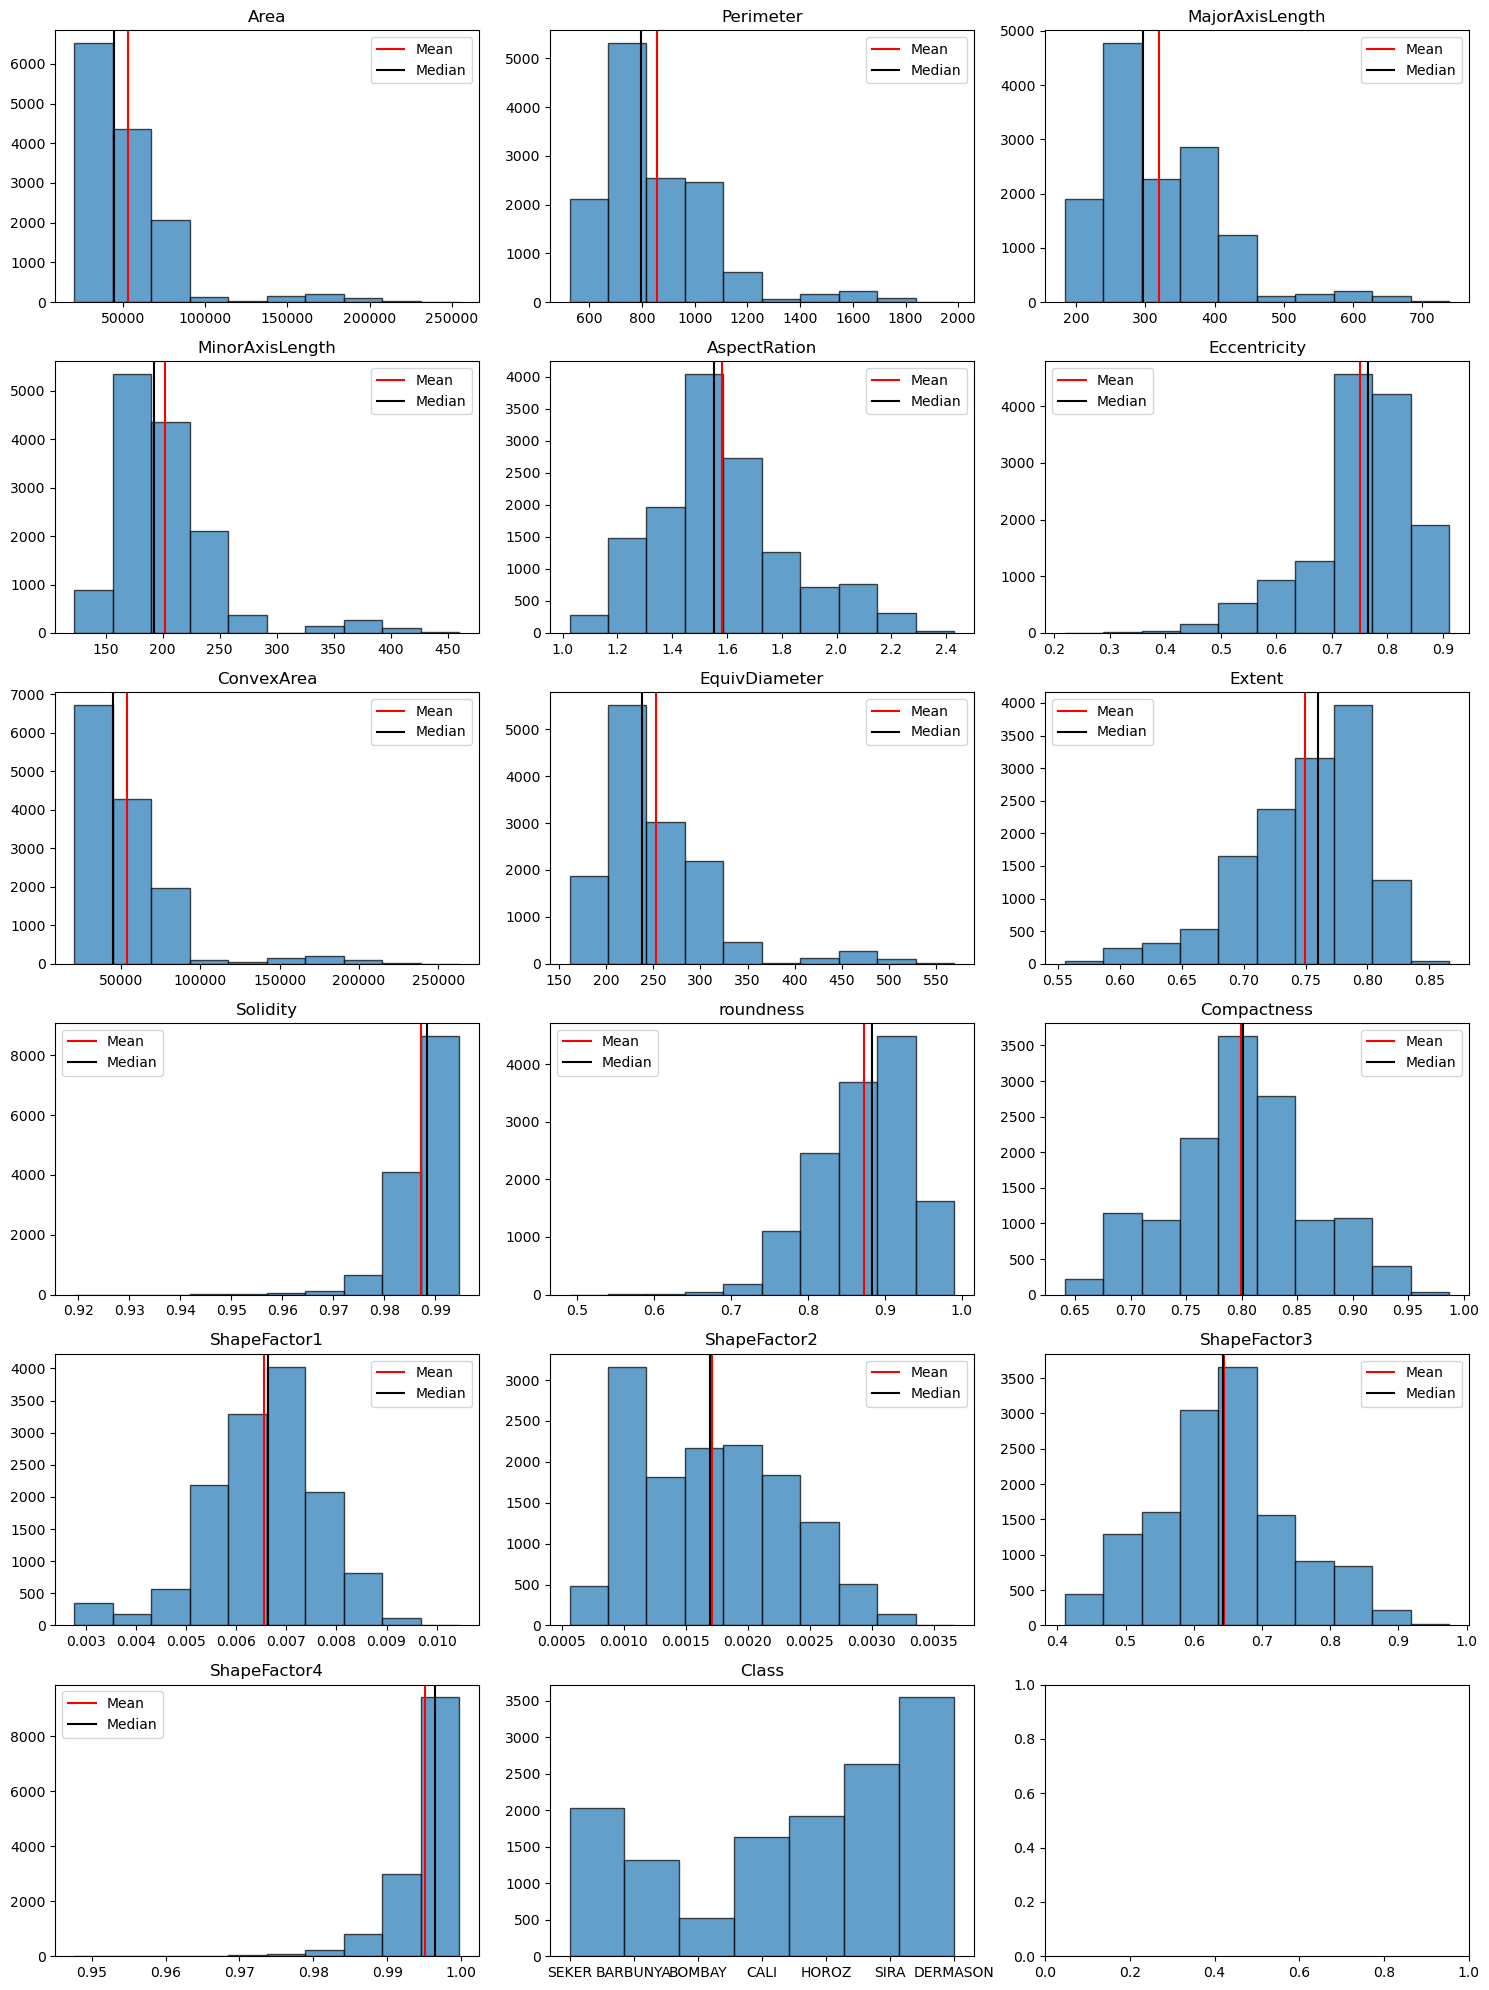

In [4]:
cols = np.array(bean_df.columns)
count=0

col_df = pd.DataFrame(columns=[['Column','Mean','Median', 'Standard Deviation', 'Min', 'Max']])

fig, ax = plt.subplots(6,3,figsize=(15,20),dpi=100)
for i,col in enumerate(ax):
    for j, row in enumerate(col):
        try:
            feature = bean_df[cols[count]]
            feature_arr = np.array(feature)
            #print(cols[count],np.mean(feature_arr))
            if (feature.dtype=='int64') or (feature.dtype=='float64'):
                col_df.loc[len(col_df.index)] = [cols[count], np.mean(feature_arr),np.median(feature_arr),np.std(feature_arr),min(feature_arr),max(feature_arr)]
            ax[i,j].set_title(cols[count])
            if feature.dtype.name == 'category':
                ax[i,j].hist(feature_arr,bins=len(feature.unique()),ec='k',alpha=0.7)
                
            else:
                ax[i,j].hist(feature_arr,ec='k',alpha=0.7)
                ax[i,j].axvline(np.mean(feature_arr),label='Mean',color='r')
                ax[i,j].axvline(np.median(feature_arr),label='Median',color='k')
                ax[i,j].legend()
            count+=1
        except IndexError:
            pass

plt.tight_layout()
#plt.savefig("feature_stats.png")
col_df

Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter all likely need to be scaled down to values on order of 1 to not have inflated weighting in any classification scheme. Several distributions have clusters far away from the main peak, possibly one or several of the bean types is significantly different than the rest in those factors? Class is fairly evenly distributed, but have a small sample size for Bombay (roughly 500). Largest sample is Dermason (roughly 3500).

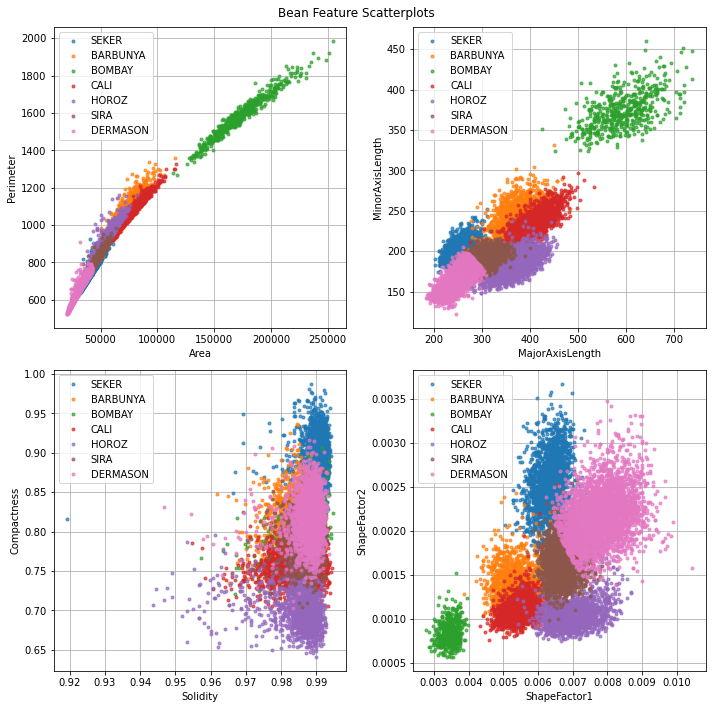

In [45]:
#See the distribution of each bean type for a few features

fig, ax = plt.subplots(2,2,figsize=(10,10))

beans = bean_df['Class'].unique()
grouped_df = bean_df.groupby('Class')

comps = [('Area','Perimeter'),('MajorAxisLength','MinorAxisLength'),('Solidity','Compactness'),('ShapeFactor1','ShapeFactor2')] #For specific comparisons
count=0
for i, col in enumerate(ax):
    for j, row in enumerate(col):
        for bean in beans:
            group_df = grouped_df.get_group(bean)
            comp = comps[count]
            row.plot(group_df[comp[0]],group_df[comp[1]],'.',label=bean,alpha=0.7)
        count+=1
        row.legend()
        row.grid()
        row.set_xlabel(comp[0])
        row.set_ylabel(comp[1])
fig.suptitle('Bean Feature Scatterplots')
plt.tight_layout()
        

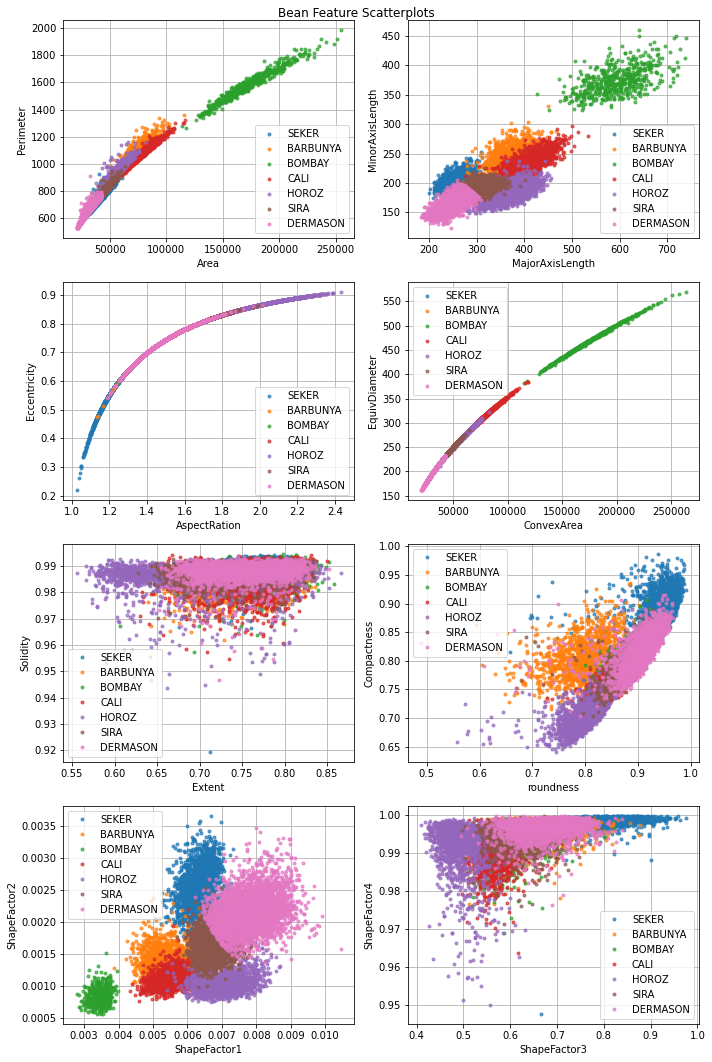

In [46]:
#See the distribution of each bean type for all features

fig, ax = plt.subplots(4,2,figsize=(10,15))

beans = bean_df['Class'].unique()
grouped_df = bean_df.groupby('Class')

count=0
for i, col in enumerate(ax):
    for j, row in enumerate(col):
        for bean in beans:
            group_df = grouped_df.get_group(bean)
            comp = (bean_df.columns[count],bean_df.columns[count+1])
            #print(comp)
            row.plot(group_df[comp[0]],group_df[comp[1]],'.',label=bean,alpha=0.7)
        count+=2
        row.legend()
        row.grid()
        row.set_xlabel(comp[0])
        row.set_ylabel(comp[1])
fig.suptitle('Bean Feature Scatterplots')
plt.tight_layout()

From plots of the features, we can make a few observations:

* Bombay beans are clearly larger than the rest of the bean types, as they stand out distinctly in several plots
* The rest of the bean types are more tightly clustered, but in several plots do see intuitive cluster separation between them, indicating that this dataset is well suited for classification
* In some plots, see tight relationships between the features. Since these features largely describe shape and size, it makes sense that these features will have a degree of intercorrelation (eg area vs diameter, etc.)

## Preprocessing

In [43]:
# Scale several features down using z-scaling

features_to_scale =['Area','Perimeter','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter']

#z-score normalization
zscore_df = bean_df.copy(deep=True)
for col in zscore_df.columns:
    if col in features_to_scale:
        arr = np.array(zscore_df[col])
        arrmean = np.mean(arr)
        arrstd = np.std(arr)

        zscore_df[col] = (arr-arrmean)/(arrstd)

In [44]:
zscore_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,1.552728,0.765002,-0.378191,-0.364148,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,-0.373334,-0.456336,-0.450053,-0.257015,1.476439,0.735702,-0.378662,-0.363962,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,-0.372038,-0.447833,-0.450478,-0.246456,1.472582,0.734065,-0.376143,-0.362197,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,-0.371765,-0.427029,-0.428974,-0.266742,1.489326,0.741055,-0.372851,-0.361825,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Classification

### Classification Model 1: